<a href="https://colab.research.google.com/github/yoooniverse/NLP/blob/main/LinearRegression_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf

In [ ]:
w = tf.Variable(2.)

def f(w) :
  y = w**2
  z = 2*y + 5

  return z

In [ ]:
with tf.GradientTape() as tape:
  z = f(w)

gradients = tape.gradient(z, [w])

print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


In [ ]:
w = tf.Variable(4.0)
b = tf.Variable(1.0)

1. @tf.fucntion annotation을 붙이면 tf1.x 스타일로 해당 함수내의 로직이 동작한다.
2. 따라서 상황에 따라 속도가 약간 빨라질 수 있다.
3. 다만 해당 annotation을 붙이면 값을 바로 계산해볼수 없어서 모든 로직에 대한 프로그래밍이 끝난 뒤에 붙이는 것이 좋다.

In [ ]:
@tf.function
def hypothesis(x):
  return w*x + b

In [ ]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


In [ ]:
@tf.function
def mse_loss(y_pred, y):
  return tf.reduce_mean(tf.square(y_pred - y))

In [ ]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

In [ ]:
#옵티마이저는 경사 하강법을 사용하되, 학습률(learning rate)는 0.01을 사용
optimizer = tf.optimizers.SGD(0.01)

In [ ]:
for i in range(301):
  with tf.GradientTape() as tape:
    y_pred = hypothesis(x)
    cost = mse_loss(y_pred, y)
  
  gradients = tape.gradient(cost, [w, b])

  optimizer.apply_gradients(zip(gradients, [w,b]))

  if i % 10 == 0:
    print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

In [ ]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


linear regression with keras api

케라스로 모델을 만드는 기본적인 형식은 다음과 같습니다. Sequential로 model이라는 이름의 모델을 만들고, 그리고 add를 통해 입력과 출력 벡터의 차원과 같은 필요한 정보들을 추가해갑니다.


공부한 시간을 x, 각 공부한 시간에 따른 성적을 y라고 해봅시다.  
activation은 어떤 함수를 사용할 것인지를 의미하는데 선형 회귀를 사용할 경우에는 linear라고 기재합니다.

옵티마이저로 기본 경사 하강법을 사용하고 싶다면, sgd라고 기재합니다.  
학습률은 0.01로 정하였습니다. 손실 함수로는 평균 제곱 오차를 사용합니다. 그리고 전체 데이터에 대한 훈련 횟수는 300으로 합니다.

↓ with Sequential API

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

x = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

model = Sequential()

model.add(Dense(1, input_dim=1, activation='linear'))
sgd = optimizers.SGD(lr=0.01)
model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
model.fit(x, y, epochs=300)
'''
Epoch 300/300
1/1 [==============================] - 0s 8ms/step - loss: 1.0693 - mse: 1.0693
<keras.callbacks.History at 0x7f73abbb2490>
'''

1/1 [==============================] - 0s 297ms/step


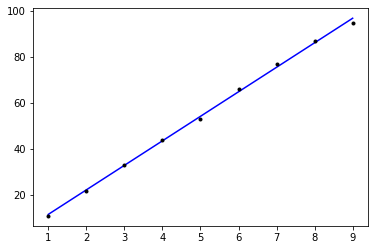

In [ ]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

In [ ]:
print(model.predict([9.5]))

1/1 [==============================] - 0s 47ms/step
[[102.18977]]


↓ with Functional API

동일 시나리오

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model

X = [1, 2, 3, 4, 5, 6, 7, 8, 9] # 공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

inputs = Input(shape=(1,))
output = Dense(1, activation='linear')(inputs)
linear_model = Model(inputs, output)

sgd = optimizers.SGD(lr=0.01)

linear_model.compile(optimizer=sgd, loss='mse', metrics=['mse'])
linear_model.fit(X, y ,epochs=300)
'''
Epoch 300/300
1/1 [==============================] - 0s 9ms/step - loss: 1.0831 - mse: 1.0831
<keras.callbacks.History at 0x7f499782a8b0>
'''

1/1 [==============================] - 1s 822ms/step


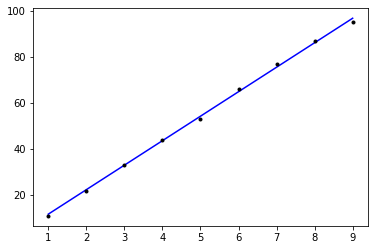

In [4]:
plt.plot(X, linear_model.predict(X), 'b', X, y, 'k.')

In [6]:
print(linear_model.predict([9.5]))

1/1 [==============================] - 0s 174ms/step
[[102.12861]]
